In [1]:
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#This is just whats ready locally on my machine
df =  pd.read_csv('C:/Users/farha/Desktop/uni stage 3/Introduction to AI/COURSEWORK/Github/intro-to-ai-farhan-labi/covid_19_indonesia_time_series_all.csv')

In [4]:
df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,-22,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,-20,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.00,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,-1,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,-18,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,12/2/2021,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,93,Province,NaN,Sulawesi Utara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,11,4.0,171,332.0,1507.0,13892,2641884,190.17,124.521240,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%,NaN,1.0
21755,12/2/2021,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,92,Province,NaN,Sumatera Barat,Indonesia,Asia,Sumatera,UTC+07:00,NaN,12,7.0,179,230.0,928.0,42013,5519245,131.37,100.465062,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%,4.00,1.0
21756,12/2/2021,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,36,Province,NaN,Sumatera Selatan,Indonesia,Asia,Sumatera,UTC+07:00,NaN,13,4.0,241,387.0,2853.0,91592,8217551,89.72,104.169465,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,4.00,1.0
21757,12/2/2021,ID-SU,Sumatera Utara,4,0,1,3,106045,2889,103061,95,Province,NaN,Sumatera Utara,Indonesia,Asia,Sumatera,UTC+07:00,NaN,25,8.0,450,693.0,5417.0,72981,14874889,203.82,99.051964,2.191894,0.27,7129.13,0.00,194.22,19.42,2.72%,97.19%,1.00,1.0


In [5]:
#Checking for any null values
print(df.isnull().any())

Date                           False
Location ISO Code              False
Location                       False
New Cases                      False
New Deaths                     False
New Recovered                  False
New Active Cases               False
Total Cases                    False
Total Deaths                   False
Total Recovered                False
Total Active Cases             False
Location Level                 False
City or Regency                 True
Province                        True
Country                        False
Continent                      False
Island                          True
Time Zone                       True
Special Status                  True
Total Regencies                False
Total Cities                    True
Total Districts                False
Total Urban Villages            True
Total Rural Villages            True
Area (km2)                     False
Population                     False
Population Density             False
L

In [6]:
#Create a copy of the dataset to work on
df_regression = df.copy()

In [7]:
#For the NA values that are in int columns, fill them with medians 
med_gf_nc = df_regression['Growth Factor of New Cases'].median()
med_gf_nd = df_regression['Growth Factor of New Deaths'].median()
med_tot_uv = df_regression['Total Urban Villages'].median()
med_tot_rv = df_regression['Total Rural Villages'].median()
med_tot_c = df_regression['Total Cities'].median()

df_regression['Growth Factor of New Cases'] = df_regression['Growth Factor of New Cases'].fillna(med_gf_nc)

df_regression['Growth Factor of New Deaths'] = df_regression['Growth Factor of New Deaths'].fillna(med_gf_nd)

df_regression['Total Urban Villages'] = df_regression['Total Urban Villages'].fillna(med_tot_uv)

df_regression['Total Rural Villages'] = df_regression['Total Rural Villages'].fillna(med_tot_rv)

df_regression['Total Cities'] = df_regression['Total Cities'].fillna(med_tot_c)

In [8]:
#We can drop the columns: City or Regency, Province, Island, Time Zone, Special Status.
#This is because we already have Location and Location ISO code, for the whole of Indonesia
df_regression = df_regression.drop(columns=['City or Regency', 'Province', 'Island', 'Time Zone', 'Special Status'])

In [9]:
#Encode variables
for column in df_regression.columns:
    df_regression[column] = LabelEncoder().fit(df_regression[column]).transform(df_regression[column])

In [10]:
#X y values
X = df_regression.drop(columns=['New Active Cases']) 
y = df_regression['New Active Cases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [13]:
rmse_data = []
r2_data = []
nums = []
for i in range(1,3):
    rf_model = RandomForestClassifier(n_estimators=i,criterion="entropy")
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2 = metrics.r2_score(y_test, y_pred)
    rmse_data.append(rmse)
    r2_data.append(r2)
    nums.append(i)

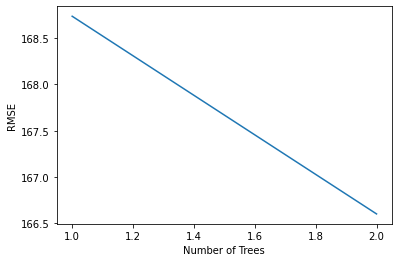

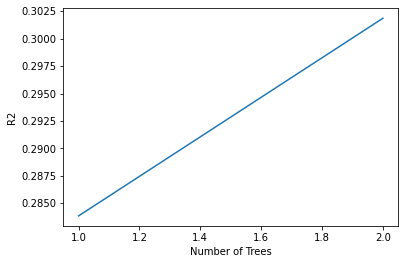

In [14]:
#Plotting n estimator vs r2 & n estimator vs rmse
plt.plot(nums,rmse_data)
plt.xlabel("Number of Trees")
plt.ylabel("RMSE")
plt.show()

plt.plot(nums,r2_data)
plt.xlabel("Number of Trees")
plt.ylabel("R2")
plt.show()